In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
# Establishment of Dataset
# Left hand side
a = 0
# Right hand side
b = 10
# Optimization Objects, Change this place to play with it
def f(x):
    return(10 * np.sin(5 * x) + 7 * np.cos(4 * x))
#def f(x):
    #return(1/x*np.sin(1/x))

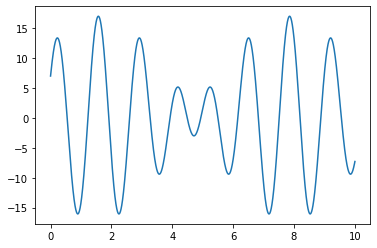

In [19]:
#Plot the Figure
t = np.linspace(a,b,10001)
plt.figure()
plt.plot(t,f(t))

In [29]:
# Population: P: How much antibody/chromosome do you have? L: length of chromore
P = 5
L = 20
antibody = np.random.randint(0,2,[P,L])

In [30]:
antibody

array([[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]])

In [31]:
x_storage = []
n = 5 # How much do you want to clone
rho = 5  #mutation parameters


for epoch in range(0,100,1):
    # Compute the Affinity
    # Decode of chromosome
    x = a + (b-a) * np.matmul(antibody,2**np.arange(0,L,1)) / (2**L-1)
    # Store the history
    x_storage.append(x)
    # Compute the Objective Value: Affinity of Antigen and Antibody
    y = f(x)

    # Sort the Objective Value according to descending order
    sorted_x = x[np.argsort(-y)]
    sorted_antibody = antibody[np.argsort(-y)]
    sorted_y = y[np.argsort(-y)]
    print(sorted_y[0:n])
    
    #Compute the mutated rate
    ## Minimax Regularization
    standard_y = (sorted_y[0:n] - min(sorted_y[0:n]))/(max(sorted_y[0:n]) - min(sorted_y[0:n]))
    ## Compute the mutation rate
    mutation_rate = np.exp(-rho * standard_y)


    # Clone more for the larger value
    antibody_cloned = []
    mutation_rate_cloned = []    
    for i in range(1,n+1,1):
        for j in range(0,i,1):
            antibody_cloned.append(list(sorted_antibody[j]))
            mutation_rate_cloned.append(mutation_rate[j])
    antibody_cloned = np.array(antibody_cloned)

    # Mutation
    ## Whether mutated
    mask = np.zeros(antibody_cloned.shape)
    for i in range(0,antibody_cloned.shape[0],1):
        mask[i,:] = mutation_rate_cloned[i] > np.random.rand(L)

    antibody_mutated = np.zeros(antibody_cloned.shape)

    for i in range(0,antibody_cloned.shape[0],1):
        for j in range(0,antibody_cloned.shape[1],1):
            if mask[i,j] == 0:
                antibody_mutated[i,j] = antibody_cloned[i,j]
            else:
                if antibody_cloned[i,j] == 1:
                    antibody_mutated[i,j] = 0
                else:
                    antibody_mutated[i,j] = 1
    # Integration
    antibody_whole = np.vstack([antibody,antibody_mutated])       
    # Compute the affinity again
    x = a + (b-a) * np.matmul(antibody_whole,2**np.arange(0,L,1)) / (2**L-1)
    # Compute the Objective Value: Affinity of Antigen and Antibody
    y = f(x)
    # Sort the Objective Value according to descending order
    sorted_x = x[np.argsort(-y)]
    sorted_antibody = antibody_whole[np.argsort(-y)]
    sorted_y = y[np.argsort(-y)]
    # Choose the best 90% to be the next generations
    preserve_number = int(0.9 * P)
    antibody[0:preserve_number,:] = sorted_antibody[0:preserve_number,:]
    antibody[preserve_number:P,:] = np.random.randint(0,2,[P - preserve_number,L])    
    
# The final epoch storage
x = a + (b-a) * np.matmul(antibody,2**np.arange(0,L,1)) / (2**L-1)
# Store the history
x_storage.append(x)

[  3.39520103  -5.24233629  -7.63434975  -9.20725309 -16.05709984]
[15.13101407  9.9477586   9.53486019  9.52466586  3.61846402]
[16.90748429 15.13101407 15.13101407 15.13101407  8.75517988]
[16.90748429 16.90748429 16.90748429 16.90748429 -8.38012762]
[ 16.9124054   16.90748429  16.90748429  16.90748429 -15.53248411]
[16.97010613 16.9124054  16.9124054  16.9124054  12.91806438]
[16.97010613 16.97010613 16.97010613 16.97010613 10.64162197]
[16.97010613 16.97010613 16.97010613 16.97010613 12.06211049]
[16.97045986 16.97010613 16.97010613 16.97010613 16.61307361]
[16.97116099 16.97045986 16.97045986 16.97045986  2.64083316]
[16.97116099 16.97116099 16.97116099 16.97116099  3.50194084]
[ 16.97116099  16.97116099  16.97116099  16.97116099 -14.58223096]
[16.97116099 16.97116099 16.97116099 16.97116099 11.74796237]
[ 16.97116099  16.97116099  16.97116099  16.97116099 -15.78071246]
[16.97116099 16.97116099 16.97116099 16.97116099  5.33946305]
[16.97116099 16.97116099 16.97116099 16.97116099 1

In [32]:
x_storage

[array([5.38760699, 7.40755788, 9.89899626, 8.53181699, 9.6632382 ]),
 array([1.46818301, 1.78255251, 9.03823761, 5.37784136, 0.37704504]),
 array([1.54817729, 1.46818301, 1.46818301, 1.46818301, 9.38795031]),
 array([1.54817729, 1.54817729, 1.54817729, 1.54817729, 5.94655604]),
 array([1.54878764, 1.54817729, 1.54817729, 1.54817729, 2.30250578]),
 array([1.55794292, 1.54878764, 1.54878764, 1.54878764, 6.56235367]),
 array([1.55794292, 1.55794292, 1.55794292, 1.55794292, 0.36025082]),
 array([1.55794292, 1.55794292, 1.55794292, 1.55794292, 8.02363207]),
 array([1.55801922, 1.55794292, 1.55794292, 1.55794292, 1.52446892]),
 array([1.5581718 , 1.55801922, 1.55801922, 1.55801922, 6.78972892]),
 array([1.5581718 , 1.5581718 , 1.5581718 , 1.5581718 , 4.33680948]),
 array([1.5581718 , 1.5581718 , 1.5581718 , 1.5581718 , 8.62393248]),
 array([1.5581718 , 1.5581718 , 1.5581718 , 1.5581718 , 3.02532485]),
 array([1.5581718 , 1.5581718 , 1.5581718 , 1.5581718 , 0.93470663]),
 array([1.5581718 , 

(0.0, 10.0)

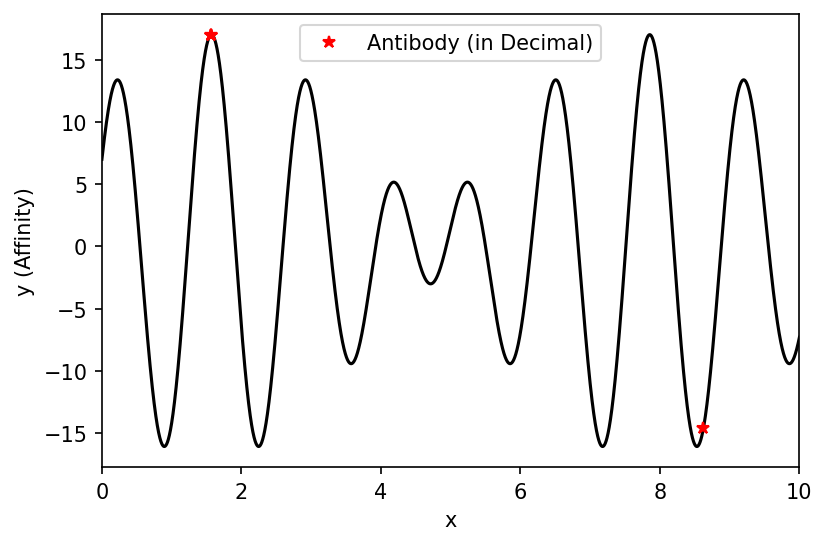

In [33]:
#看看epoch = 11时收不收敛,收敛的话从0画到11
epoch = 11
plt.figure(dpi = 150)
plt.plot(t,f(t),'black')
plt.plot(x_storage[epoch],f(x_storage[epoch]),'r*',label = 'Antibody (in Decimal)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y (Affinity)')
plt.xlim([a,b])